Class: CS 4267/01

Term: Spring 2020

Name: Sepehr Goshayeshi

Instructor: Dr. Aledhari

Assignment 2

Source for Guide: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle

Using TensorFlow backend.


Importing the Dataset

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Bank_Predictions.csv')

# Part-1: Data preprocessing

Encoding categorical data labels

In [0]:
X = dataset.iloc[:,3:13].values #features

In [0]:
y = dataset['Acc_Closed'].values #labels

In [0]:
# for encoding different labels in a  column with values between 0 to n_classes-1.
X[:, 1] = LabelEncoder().fit_transform(X[:, 1]) # replacing location names with 0,1,2
X[:, 2] = LabelEncoder().fit_transform(X[:, 2]) # replacing gender with 0 and 1

In [0]:
# need to create "dummy variables" for locations
X = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough').fit_transform(X)
X = X[:, 1:]

Feature Scaling

In [0]:
X = StandardScaler().fit_transform(X)


Splitting and Shuffling the Dataset into Training and Test Sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Part-2: Build the ANN

ANN Design

In [9]:
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 11))
# Adding the second hidden layer
model.add(Dense(6, activation = 'relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))
# Compiling the ANN
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Fitting the ANN to the training set

In [10]:
history = model.fit(X_train, y_train, batch_size = 10, nb_epoch = 60, shuffle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/60





8000/8000 [==============================] - 1s 159us/step - loss: 0.4988 - acc: 0.7965
Epoch 2/60
8000/8000 [==============================] - 1s 123us/step - loss: 0.4416 - acc: 0.8039
Epoch 3/60
8000/8000 [==============================] - 1s 127us/step - loss: 0.4209 - acc: 0.8119
Epoch 4/60
8000/8000 [==============================] - 1s 130us/step - loss: 0.4034 - acc: 0.8181
Epoch 5/60
8000/8000 [==============================] - 1s 130us/step - loss: 0.3904 - acc: 0.8226
Epoch 6/60
8000/8000 [==============================] - 1s 123us/step - loss: 0.3819 - acc: 0.8256
Epoch 7/60
8000/8000 [==============================] - 1s 128us/step - loss: 0.3749 - acc: 0.8330
Epoch 8/60
8000/8000 [==============================] - 1s 125us/step - loss: 0.3697 - acc: 0.8447
Epoch 9/60
8000/8000 [==============================] - 1s 125us/step - loss: 0.3656 - acc: 0.8479
Epoch 10/60
8000/8000 [==============================] - 1s 132us/step - loss: 0.3624 - acc: 0.8530
Ep

Plot training loss values

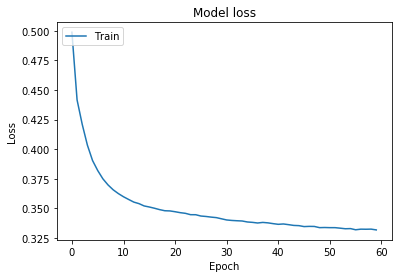

In [11]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

Predicting the Test set results

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Making the confusion Matrix

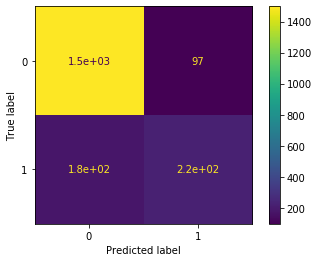

In [13]:
#Plot confusion matrix
displayCM = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), ['0', '1'])
displayCM.plot()

Accuracy Score

In [14]:
print('Predictive accuracy for test set is {:.2%}'.format(accuracy_score(y_test, y_pred)))

Predictive accuracy for test set is 86.15%
